# Visualization of the AQI data

## Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [17]:
# Read data
braga_data = pd.read_csv('OpenAQ/braga_air_data.csv')

## General features

In [18]:
braga_data.head()

,locationId,utc,latitude,longitude,AQI
0,7188,2017-12-29T04:00:00+00:00,41.549722,-8.405833,67
1,7188,2017-12-29T04:00:00+00:00,41.549722,-8.405833,67
2,7188,2017-12-29T03:00:00+00:00,41.549722,-8.405833,67
3,7188,2017-12-29T03:00:00+00:00,41.549722,-8.405833,67
4,7188,2017-12-29T02:00:00+00:00,41.549722,-8.405833,67


In [19]:
braga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72657 entries, 0 to 72656
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  72657 non-null  int64  
 1   utc         72657 non-null  object 
 2   latitude    72657 non-null  float64
 3   longitude   72657 non-null  float64
 4   AQI         72657 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.8+ MB


In [20]:
braga_data.describe()

,locationId,latitude,longitude,AQI
count,72657.000000,72657.000000,72657.000000,72657.000000
mean,7926.733556,41.511771,-8.379521,16.096054
std,763.973586,0.059768,0.080114,16.717015
min,7188.000000,41.449722,-8.456944,0.000000
25%,7191.000000,41.449722,-8.456944,0.000000
50%,7191.000000,41.569444,-8.456944,0.000000
75%,8720.000000,41.569444,-8.296389,33.000000
max,8720.000000,41.569444,-8.296389,67.000000


## Explore Data

In [21]:
sns.set_theme(palette="pastel")

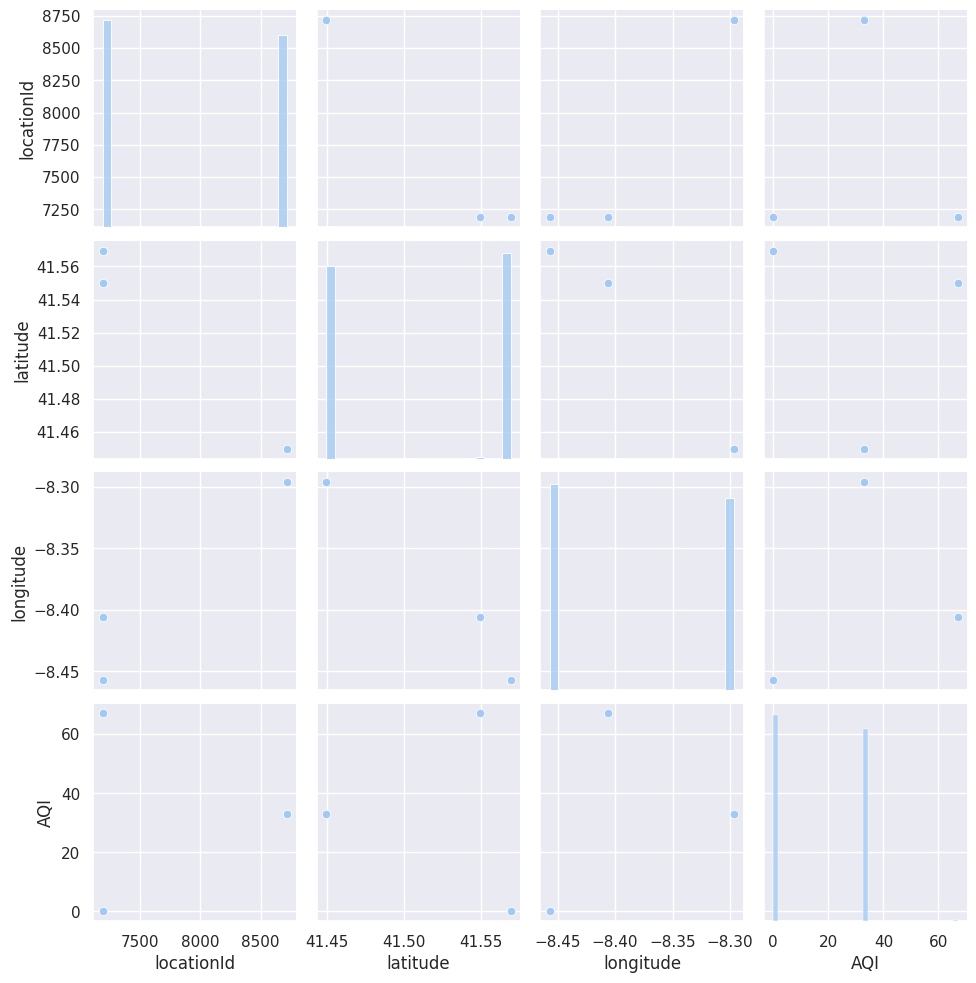

In [22]:
sns.pairplot(braga_data)

<Axes: xlabel='AQI', ylabel='Count'>

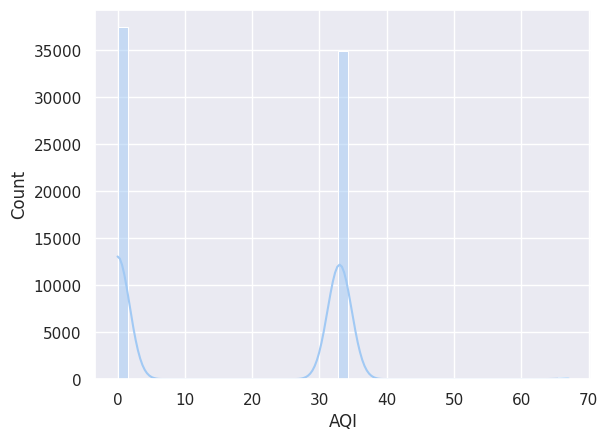

In [23]:
sns.histplot(braga_data['AQI'],kde=True)

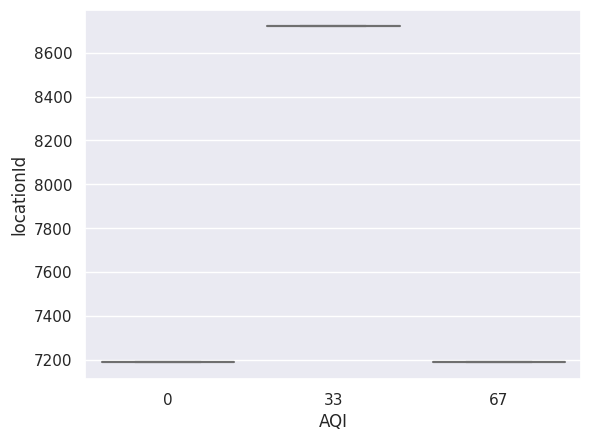

In [24]:
ax = sns.boxplot(x=braga_data["AQI"], y=braga_data["locationId"])

<Axes: >

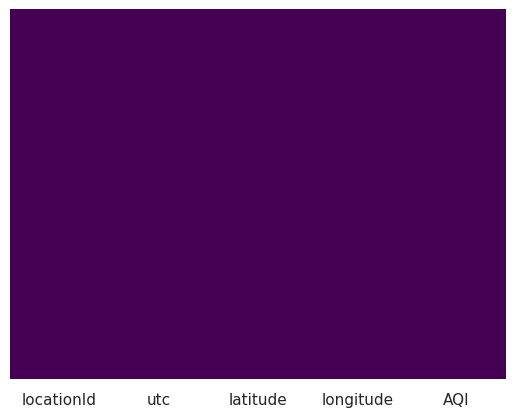

In [25]:
sns.heatmap(braga_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

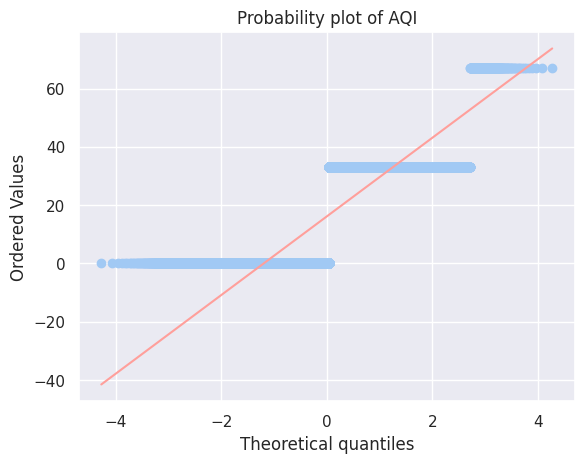

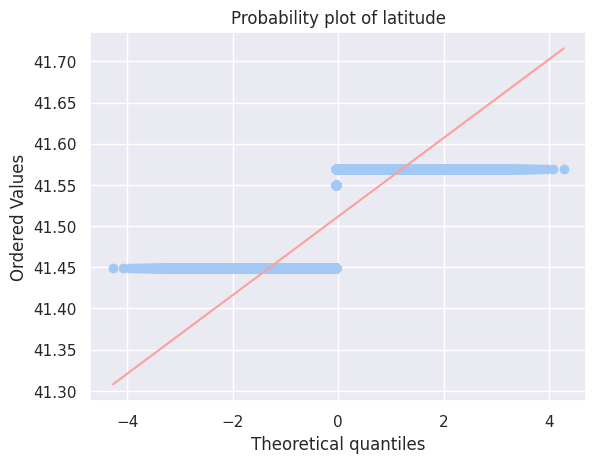

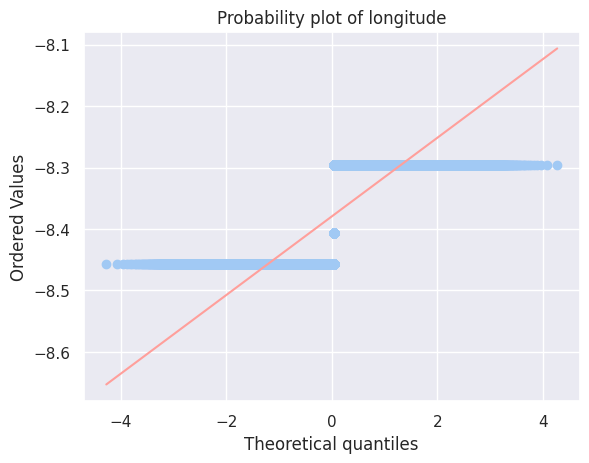

In [26]:
def plot_probplots(columns, df):
    import scipy.stats as stats
    for column in columns:
        plt.figure()
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f"Probability plot of {column}")
    plt.show()

columns = ['AQI', 'latitude', 'longitude']
plot_probplots(columns,braga_data)

/tmp/ipykernel_16808/1674169430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(braga_data.corr(), annot = True, cmap='coolwarm')


<Axes: >

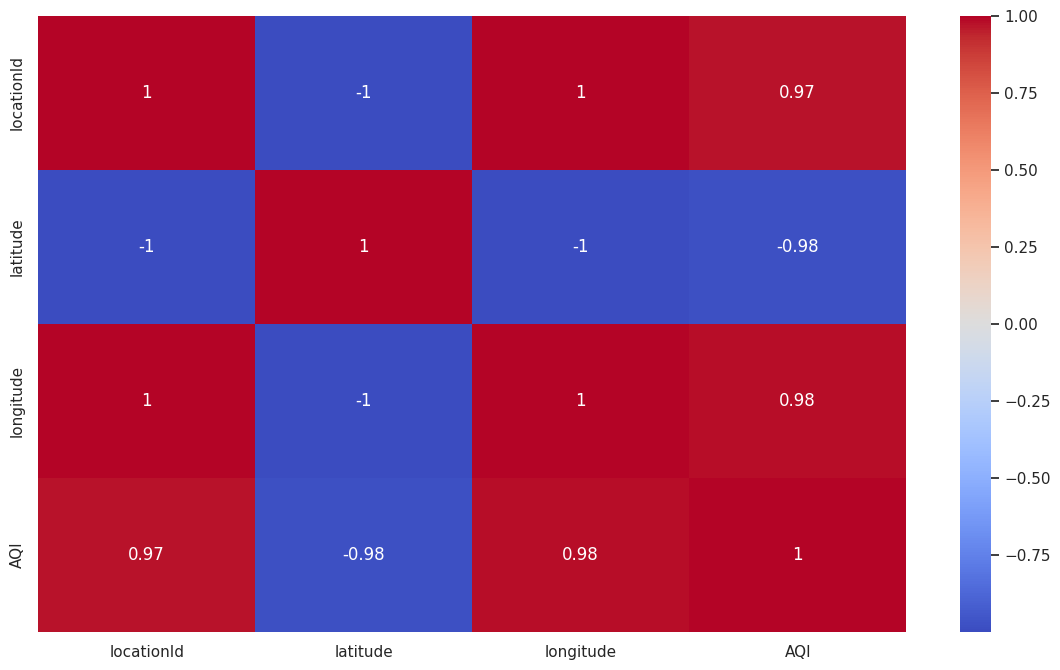

In [27]:
plt.subplots(figsize=(14,8))
sns.heatmap(braga_data.corr(), annot = True, cmap='coolwarm')